In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn .preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

## Problem Statement

Menentukan kelas pelanggan - Platinum, Gold, dan Silver 

- Pelanggan Platinum = penghasil pendapatan yang sering dan lebih banyak.
- Pelanggan gold = penghasil pendapatan yang sering tetapi lebih sedikit.
- pelanggan silver = penghasil pendapatan yang lebih jarang dan lebih sedikit. \

In [5]:
data = pd.read_csv('C:/Users/giryi/Junior DataScientist/data_RFM.csv', encoding="ISO-8859-1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
missing = data.isnull().sum()
missing

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data.dropna(subset=['CustomerID'],how='all', inplace=True)

In [9]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Data yang digunakan untuk pengolahan selanjutnya haruslah data yang benar positif sehingga mencerminkan proses transaksi yang di lakukan

## Filtering data

filtering data dengan menghasilkan nilai minus/nol yang diinterpretasikan transaksi yang gagal pada quantity sedangkan UnitPrice harusnya sama dengan nol ( memungkinkan adanya diskon 100 % ) hingga lebih besar

In [12]:
data2 = data[(data.Quantity > 0) & (data.UnitPrice >= 0)]
print(data2.describe())

            Quantity      UnitPrice     CustomerID
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174   15294.315171
std       180.420210      22.096788    1713.169877
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000


In [16]:
#melihat jumlah produk, jumlah transaksi, dan pelanggan
total = pd.DataFrame([{'products':len(data2['StockCode'].value_counts()),
                      'transactions': len(data2['InvoiceNo'].value_counts()),
                      'customers': len(data2['CustomerID'].value_counts()),}],
                   columns= ['products','transactions','customers'], index=['quantity'])
print(total)

          products  transactions  customers
quantity      3665         18536       4339


In [21]:
data2['InvoiceDate'].max()

'9/9/2011 9:52'

In [22]:
data2.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [26]:
#ambil data paling terakhir transaksi
import datetime as dt
now = dt.date(2011,12,9)

In [27]:
data2['date'] = pd.DatetimeIndex(data2.InvoiceDate).date

In [28]:
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


## Recency

In [30]:
# mengroupkan data berdasarkan cutomer terakhir membeli
recency_df = data2.groupby(['CustomerID'], as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


customer id 12346 adalah customer yang terakhir melakukan pembelian di toko pada tanggal 18 januari 2011

In [31]:
#hitung seberapa sering dia membeli dengan mengacu pada tanggal terbaru dalam beberapa hari
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


## Frequency 

In [34]:
#cek frekuensi pelanggan berarti sudah berapa kali transaksi

frequency_df = data2.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep='first', inplace=True)
frequency_df = frequency_df.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


## Monetary

In [35]:
data2['Total_cost'] = data2['UnitPrice'] * data2['Quantity']

In [36]:
monetary_df = data2.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [37]:
# menggabungkan recency dan frekuensi untuk pertama
rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')

# menggabungkan rf frame dengan monetary
rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')
rfm.set_index('CustomerID',inplace=True)
rfm.head()

,LastPurchaseDate,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,2011-01-18,325,1,77183.60
12347.0,2011-12-07,2,7,4310.00
12348.0,2011-09-25,75,4,1797.24
12349.0,2011-11-21,18,1,1757.55
12350.0,2011-02-02,310,1,334.40


In [38]:
rfm.drop(columns=['LastPurchaseDate'],inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


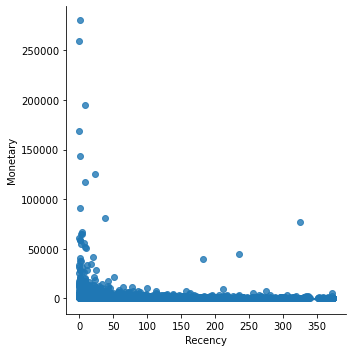

In [41]:
sns.lmplot(x='Recency', y='Monetary', data=rfm,fit_reg=True)

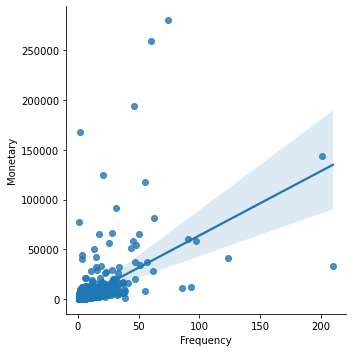

In [42]:
sns.lmplot(x='Frequency', y='Monetary', data=rfm,fit_reg=True)

In [43]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,307.245
0.50,50.0,2.0,674.450
0.75,141.5,5.0,1661.640


In [44]:
RFMScores= rfm.copy()
#Recency Scoring
def Rscoring(x,p,d):
   if x <= d[p][0.25]:
      return 1
   elif x <= d[p][0.50]:
      return 2
   elif x <= d[p][0.75]:
      return 3
   else:
      return 4
#Frequency and Monetary Scoring
def FMscoring (x,p,d):
   if x <= d[p][0.25]:
      return 4
   elif x <= d[p][0.50]:
      return 3
   elif x <= d[p][0.75]:
      return 2
   else:
      return 1
RFMScores['R']=RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FMscoring, args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FMscoring, args=('Monetary',quantiles))
RFMScores['RFMgroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['Score']=RFMScores[['R','F','M']].sum(axis=1)
print(RFMScores.head())

            Recency  Frequency  Monetary  R  F  M RFMgroup  Score
CustomerID                                                       
12346.0         325          1  77183.60  4  4  1      441      9
12347.0           2          7   4310.00  1  1  1      111      3
12348.0          75          4   1797.24  3  2  1      321      6
12349.0          18          1   1757.55  2  4  1      241      7
12350.0         310          1    334.40  4  4  3      443     11


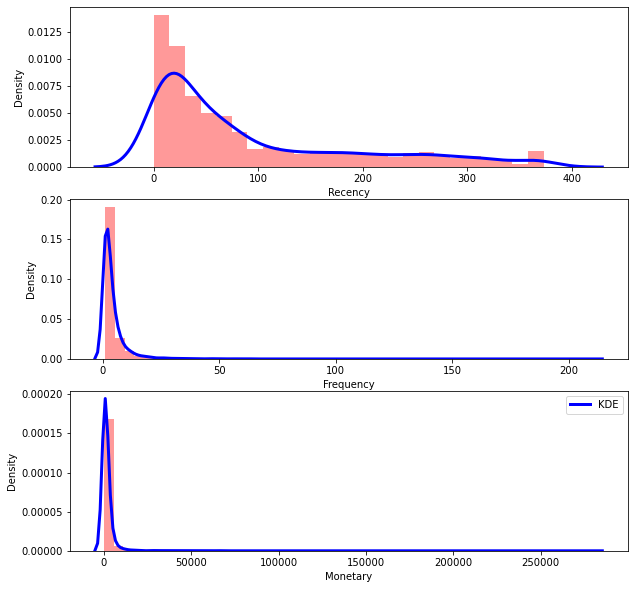

In [45]:
#Melihat distibusi data hasil RFMScore
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.legend()
plt.show()

karena persebaran datanya tidak seimbang dari hasil visualisasi diatas bisa dilihat, maka lakukan transformasi dengan menggunakan minmaxscaler

In [48]:
clustering_rfm = rfm[['Recency','Frequency','Monetary']].copy()
clustering_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


In [49]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(clustering_rfm)
data_scaled = pd.DataFrame(x_scaled,columns=['Recency','Frequency','Monetary'])
data_scaled

,Recency,Frequency,Monetary
0,0.871314,0.000000,0.275453
1,0.005362,0.028708,0.015382
2,0.201072,0.014354,0.006414
3,0.048257,0.000000,0.006272
4,0.831099,0.000000,0.001193
...,...,...,...
4334,0.742627,0.000000,0.000645
4335,0.482574,0.000000,0.000288
4336,0.018767,0.004785,0.000635
4337,0.008043,0.071770,0.007476


## Elbow method untuk mengetahui nilai K

TypeError: Got both 'c' and 'color', which are aliases of one another

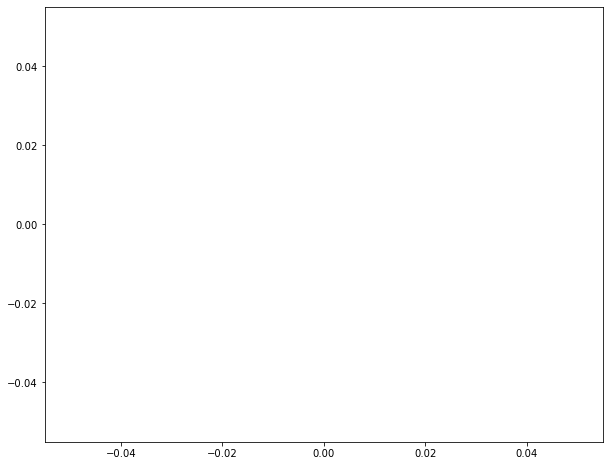

In [56]:
wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_scaled)
    wscc.append(kmeans.inertia_)  

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,15),y=wscc,marker="o",c="blue")
plt.title("Elbow plot for optimal number of clusters")

In [58]:
wscc

[322.20548394821526,
 74.13982079617116,
 40.85371776176903,
 27.177043158469306,
 20.584239474358316,
 16.094898259468174,
 12.745033981096416,
 10.876407944859368,
 9.594876347836674,
 8.21577072367372,
 7.002288113617172,
 6.077880113355889,
 5.335591665114624,
 4.622959454203278]

In [59]:
kmeans = KMeans(n_clusters=3, random_state=0,init='k-means++',
                n_init =10,max_iter = 300).fit(data_scaled)
pred = kmeans.predict(data_scaled)
RFMScores['Cluster']=kmeans.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,0
12347.0,2,7,4310.00,1,1,1,111,3,1
12348.0,75,4,1797.24,3,2,1,321,6,1
12349.0,18,1,1757.55,2,4,1,241,7,1
12350.0,310,1,334.40,4,4,3,443,11,0
12352.0,36,8,2506.04,2,1,1,211,4,1
12353.0,204,1,89.00,4,4,4,444,12,2
12354.0,232,1,1079.40,4,4,2,442,10,0
12355.0,214,1,459.40,4,4,3,443,11,2


In [60]:
RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)

,Recency,Frequency,Monetary,R,F,M,Score
Cluster,,,,,,,
0,293.944089,1.354633,607.195479,4.000000,3.736422,3.388179,11.124601
2,152.321867,2.222359,796.941095,3.563882,3.074939,2.891892,9.530713
1,31.517420,5.477406,2719.073295,1.868230,2.341152,2.198344,6.407727


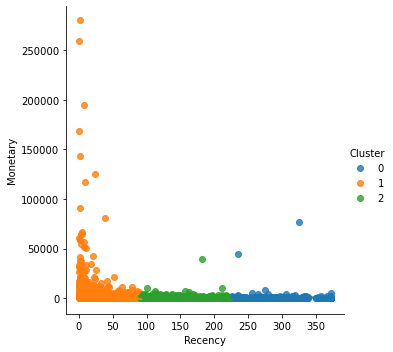

In [61]:
sns.lmplot(x='Recency', y='Monetary', data=RFMScores, hue='Cluster', fit_reg=True)

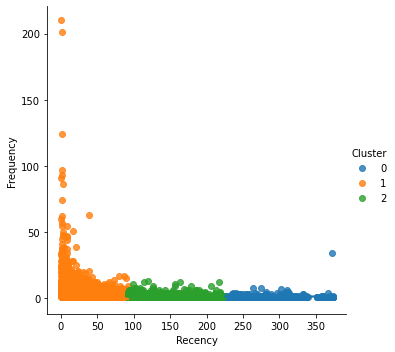

In [62]:
sns.lmplot(x='Recency', y='Frequency', data=RFMScores, hue='Cluster', fit_reg=True)

Dari hasil analisis, diperoleh 3 cluster yaitu cluster 0, cluster 1, dan cluster 2. Jika dilihat, cluster 0 memiliki recency tinggi dengan frequency rendah dan monetary rendah. Artinya, pelanggan kelompok ini sudah lama dan jarang melakukan transaksi sehingga uang yang dikeluarkan pelanggan sedikit. Cluster 1 memiliki recency paling kecil dengan frequency dan monetary paling tinggi. Artinya, pelanggan kelompok ini masih sering dan paling sering melakukan transaksi sehingga uang yang dikeluarkan pelanggan sangat besar. Sedangkan cluster 2, memiliki recency, frequency dan monetary menangah diantara cluster 0 dan 1. Artinya, pelanggan kelompok ini pelanggan yang tidak jarang dan tidak sering pula melakukan transaksi dengan uang yang dikeluarkan tidak banyak dan tidak sedikit pula. Sehingga, dapat dikatakan cluster 0 adalah pelanggan silver, cluster 1 pelanggan platinum dan cluster 2 pelanggan gold.